## Black Friday Dataset - EDA and Feature Engineering
### Cleaning and preparing the dataset for model training

Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

RANDOM_STATE = 2049

In [253]:
# importing the dataset

df_train = pd.read_csv('Datasets/blackFriday/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [254]:
df_test = pd.read_csv('Datasets/blackFriday/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [255]:
# Merge both Train and Test data

df = df_train.merge(df_test, how="outer")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00000142,F,0-17,10,A,2,0,3,4.0,5.0,13650.0
1,1000001,P00004842,F,0-17,10,A,2,0,3,4.0,12.0,13645.0
2,1000001,P00025442,F,0-17,10,A,2,0,1,2.0,9.0,15416.0
3,1000001,P00051442,F,0-17,10,A,2,0,8,17.0,NaN,9938.0
4,1000001,P00051842,F,0-17,10,A,2,0,4,8.0,NaN,2849.0


In [256]:
# Basic

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


Age is an Object because some ages are listed as "0-17". So string object.

In [257]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Drop Useless features

In [258]:
df.drop(['User_ID'], axis=1, inplace=True)

In [259]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00000142,F,0-17,10,A,2,0,3,4.0,5.0,13650.0
1,P00004842,F,0-17,10,A,2,0,3,4.0,12.0,13645.0
2,P00025442,F,0-17,10,A,2,0,1,2.0,9.0,15416.0
3,P00051442,F,0-17,10,A,2,0,8,17.0,NaN,9938.0
4,P00051842,F,0-17,10,A,2,0,4,8.0,NaN,2849.0


## Data Preprocessing

### Handling the Categorical features

Gender

In [260]:
df["Gender"] = df["Gender"].map({"F":0, "M":1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00000142,0,0-17,10,A,2,0,3,4.0,5.0,13650.0
1,P00004842,0,0-17,10,A,2,0,3,4.0,12.0,13645.0
2,P00025442,0,0-17,10,A,2,0,1,2.0,9.0,15416.0
3,P00051442,0,0-17,10,A,2,0,8,17.0,NaN,9938.0
4,P00051842,0,0-17,10,A,2,0,4,8.0,NaN,2849.0


Target Ordinal Encoding (for Age)

In [261]:
df.Age.value_counts().sort_values()

Age
0-17      21334
55+       30579
51-55     54784
46-50     65278
18-25    141953
36-45    156724
26-35    313015
Name: count, dtype: int64

In [262]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [263]:
df["Age"] = df["Age"].map(
    {
        '0-17' : 1,
        '18-25' : 2,
        '26-35' : 3,
        '36-45' : 4,
        '46-50' : 5,
        '51-55' : 6,
        '55+' : 7
    }
)

In [264]:
# # Or, you can Encode it with another technique

# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()

# df['Age'] = label_encoder.fit_transform(df['Age'])
# df['Age'].unique()

In [265]:
df.sample(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
330607,P00112842,1,3,0,C,1,0,8,17.0,NaN,9979.0
722398,P00197342,1,2,4,C,3,0,1,2.0,NaN,8050.0
101695,P0099342,1,3,5,C,1,0,5,8.0,NaN,6912.0
507421,P00307642,1,3,20,A,0,0,5,6.0,NaN,5165.0
782612,P00117742,0,3,15,B,4+,1,8,NaN,NaN,6033.0


City_Category

In [266]:
# Drop the First one because Only 2 Columns is sufficient to represent 3 Categories.
# If both B and C are False it means A.

df_city = pd.get_dummies(df['City_Category'], drop_first=True, dtype=int)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,1,0


In [267]:
df = pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,A,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,A,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,A,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,A,2,0,8,17.0,NaN,9938.0,0,0
4,P00051842,0,1,10,A,2,0,4,8.0,NaN,2849.0,0,0


In [268]:
df.drop('City_Category', axis=1, inplace=True)

In [269]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,NaN,9938.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,NaN,2849.0,0,0


### Handling Missing Values

In [270]:
df.isnull().sum()   # or, df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Product_Category_2

In [271]:
# Focus in replacing missing values

df["Product_Category_2"].unique()

array([ 4.,  2., 17.,  8., nan,  5., 14., 15.,  3.,  6.,  9., 16., 13.,
       11., 18., 12., 10.,  7.])

In [272]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [273]:
print(df["Product_Category_2"].isnull().sum())

245982


In [274]:
df["Product_Category_2"].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [275]:
# Replace the missing value with MODE

df['Product_Category_2'] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [276]:
print(df["Product_Category_2"].isnull().sum())

# All values are replaced by mode

0


In [277]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,NaN,9938.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,NaN,2849.0,0,0


Product_Category_3

In [278]:
df['Product_Category_3'].unique()

array([ 5., 12.,  9., nan, 16.,  8.,  4., 17., 14., 15., 13.,  6., 18.,
       10., 11.,  3.])

In [279]:
df["Product_Category_3"].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [280]:
print(df["Product_Category_3"].isnull().sum())

545809


In [281]:
df["Product_Category_3"].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [282]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [283]:
print(df["Product_Category_3"].isnull().sum())

# All values replaced by MODE

0


In [284]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,16.0,9938.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,16.0,2849.0,0,0


Stay_In_Current_City_Years

In [285]:
df["Stay_In_Current_City_Years"].unique()

# Need to replace that "4+"

array(['2', '4+', '3', '1', '0'], dtype=object)

In [286]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+", "")
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,16.0,9938.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,16.0,2849.0,0,0


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


Converting Object into Integer

In [288]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

# OR, df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].map(int)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


## Visualization

Pairplot

In [290]:
# sns.pairplot(df)

Barplot 
- Age vs Purchase classified on Gender basis

<Axes: xlabel='Age', ylabel='Purchase'>

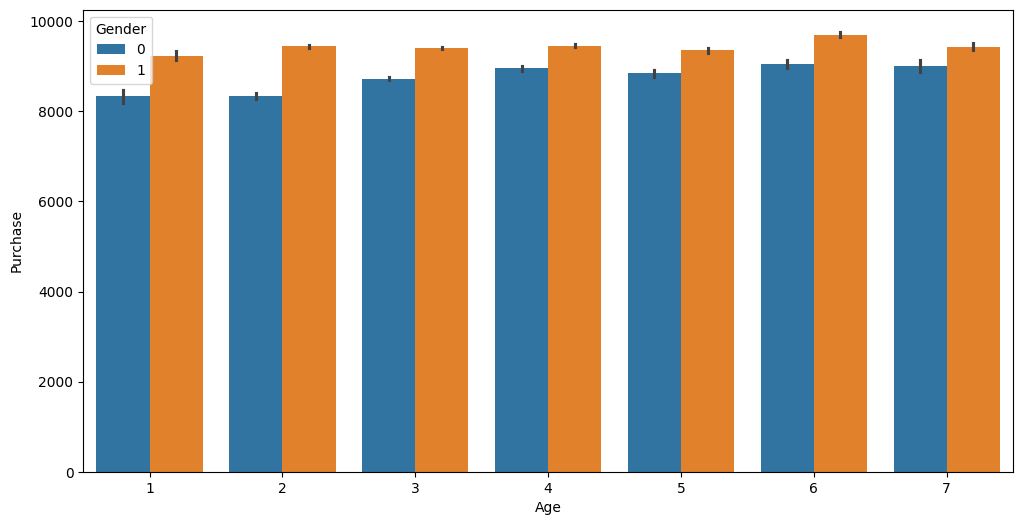

In [291]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

Observation
1. Purchasing of Men is high than Women

Barplot
- Visualization of Purchase vs Occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

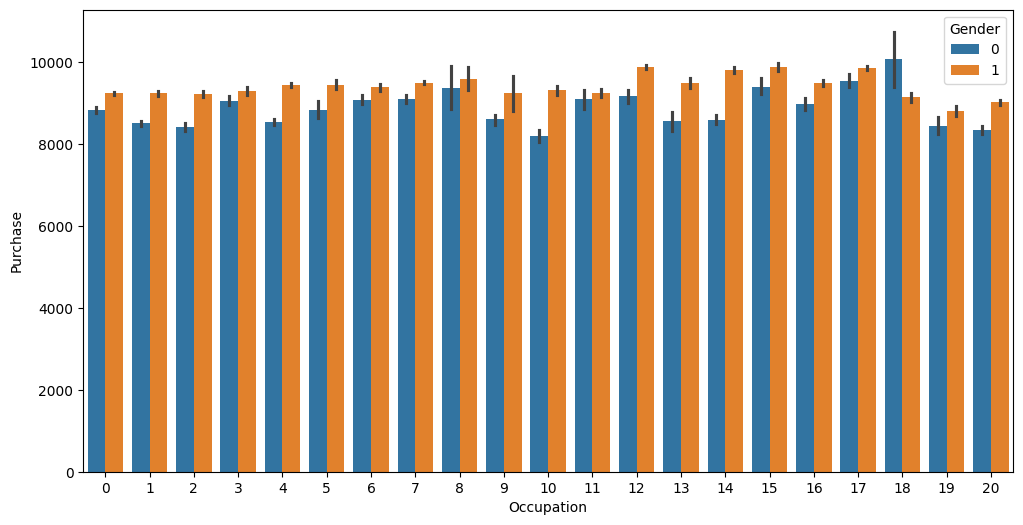

In [292]:
sns.barplot(x='Occupation', y='Purchase', hue="Gender", data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

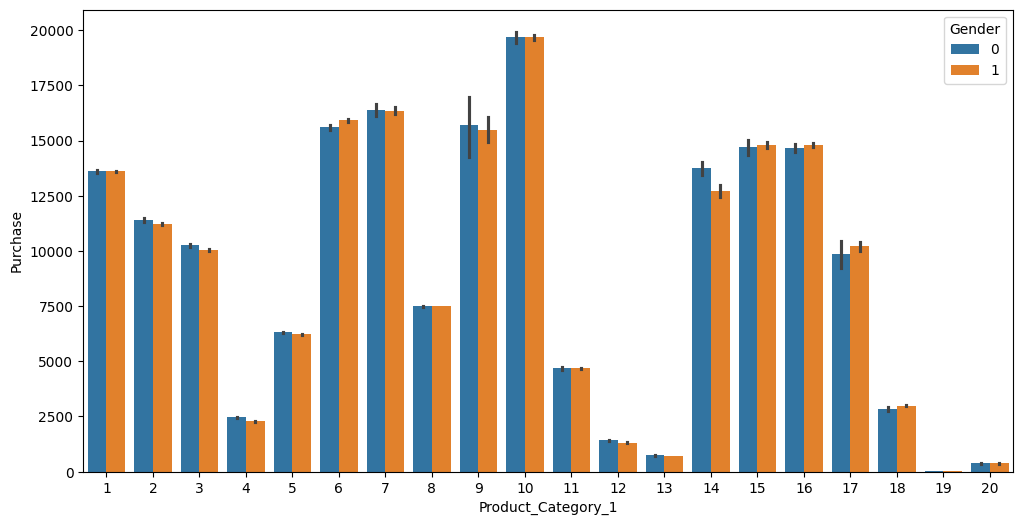

In [293]:
sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

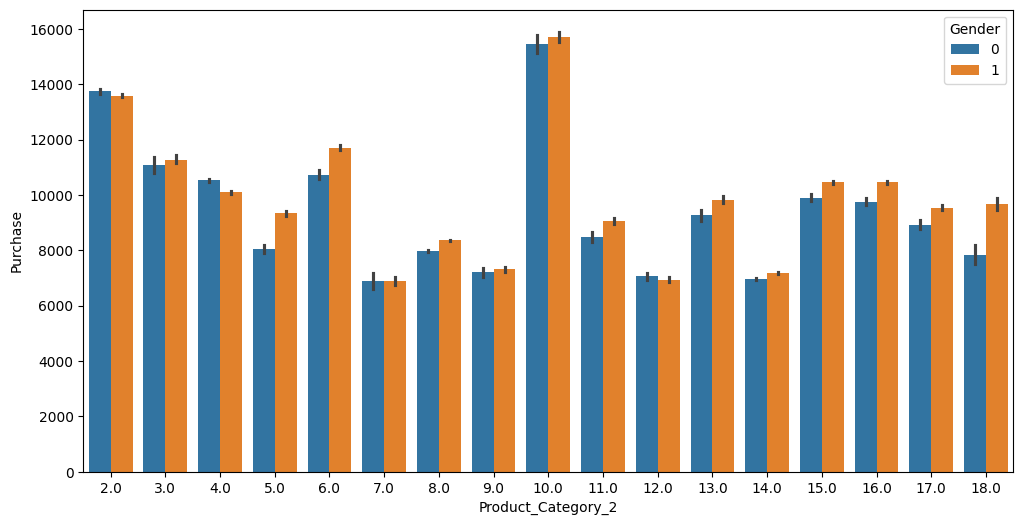

In [294]:
sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

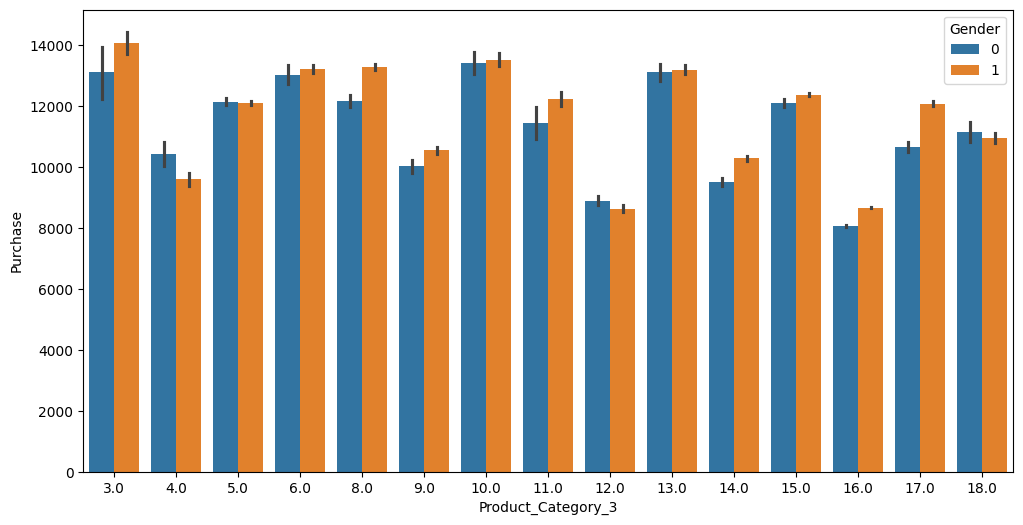

In [295]:
sns.barplot(x="Product_Category_3", y="Purchase", hue="Gender", data=df)

## Feature Scaling

In [296]:
df_test = df[ df["Purchase"].isnull() ]
df_train = df[ ~df["Purchase"].isnull() ]

In [297]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [298]:
X = df_train.drop(columns=['Purchase', 'Product_ID'])
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,4.0,5.0,0,0
1,0,1,10,2,0,3,4.0,12.0,0,0
2,0,1,10,2,0,1,2.0,9.0,0,0
3,0,1,10,2,0,8,17.0,16.0,0,0
4,0,1,10,2,0,4,8.0,16.0,0,0


In [299]:
y = df_train["Purchase"]
y.head()

0    13650.0
1    13645.0
2    15416.0
3     9938.0
4     2849.0
Name: Purchase, dtype: float64

In [300]:
X.shape, y.shape

((550068, 10), (550068,))

In [301]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

X_train     # Scaled values

array([[ 0.57310899, -0.36727952,  1.21410562, ...,  0.36804145,
        -0.85146588, -0.67233017],
       [ 0.57310899, -0.36727952,  0.60087802, ...,  0.36804145,
         1.17444518, -0.67233017],
       [ 0.57310899,  0.37122911, -1.23880478, ..., -2.19519413,
         1.17444518, -0.67233017],
       ...,
       [-1.7448688 ,  0.37122911, -0.93219098, ...,  0.36804145,
        -0.85146588, -0.67233017],
       [ 0.57310899,  2.58675498, -1.23880478, ...,  0.36804145,
        -0.85146588, -0.67233017],
       [ 0.57310899,  0.37122911, -0.16565648, ...,  0.36804145,
         1.17444518, -0.67233017]], shape=(368545, 10))